## ĐỒ ÁN CUỐI KỲ - CSC17104: LẬP TRÌNH KHOA HỌC DỮ LIỆU
### TRƯỜNG ĐẠI HỌC KHOA HỌC TỰ NHIÊN - ĐHQG-HCM
#### Khoa Công nghệ Thông tin

**Tên đề tài:** Phân tích Xu hướng Âm nhạc Toàn cầu trên Spotify (2009-2025)  
**Bộ dữ liệu:** Spotify Global Music Dataset 2009-2025

**Danh sách thành viên nhóm:**
1. 23120038 - Lê Hoàng Mỹ Hạ
2. 23120084 - Nguyễn Mạnh Thắng 
---

## 1. Data Collection

### Tổng quan về bộ dữ liệu
* **Chủ đề:** Dữ liệu này mang đến những góc nhìn về cách xu hướng âm nhạc, mức độ phổ biến của nghệ sĩ và các thể loại đã thay đổi theo thời gian, bao gồm cả những ca khúc đương đại năm 2025 và những bản hit vượt thời gian giai đoạn 2009–2023.
* **Ngữ cảnh thực tế:** Dữ liệu đại diện cho hành vi tiêu thụ âm nhạc toàn cầu và đặc điểm âm nhạc của các bài hát thịnh hành trong hơn 15 năm qua.

### Nguồn gốc
* **Nền tảng:** Kaggle
* **URL:** [https://www.kaggle.com/datasets/wardabilal/spotify-global-music-dataset-20092025](https://www.kaggle.com/datasets/wardabilal/spotify-global-music-dataset-20092025)
* **Tác giả:** Warda Bilal

### Giấy phép & Sử dụng
* **Giấy phép:** CCO [[text](https://creativecommons.org/publicdomain/zero/1.0/)]
* **Quyền sử dụng:** Được phép sử dụng cho mục đích giáo dục trong môn học này.

### Thu thập dữ liệu
* **Phương pháp thu thập:** Dữ liệu được thu thập thông qua Spotify Web API công khai, bằng các truy vấn lập trình để lấy thông tin về bài hát, nghệ sĩ, album và đặc trưng âm thanh.
* **Đối tượng và cách lấy mẫu:** Đối tượng là các bài hát và nghệ sĩ trên nền tảng Spotify toàn cầu.
Dữ liệu được chọn lọc không ngẫu nhiên, tập trung vào các bài hát phổ biến, đại diện cho xu hướng âm nhạc giai đoạn 2009–2025.

* **Thời gian:** 
    * Thời gian phát hành nhạc: 2009–2025
    * Dữ liệu được trích xuất tại thời điểm tạo bộ dữ liệu (sau năm 2023).

* **Hạn chế và thiên lệch:**
    * Thiên lệch về độ phổ biến (ưu tiên các bài hát nổi tiếng)
    * Chỉ phản ánh xu hướng trên Spotify, không đại diện toàn bộ thị trường âm nhạc
    * Một số chỉ số có thể thay đổi theo thời gian do giới hạn của API

### Lý do chọn đề tài
* Âm nhạc là chủ đề phổ biến và dễ tiếp cận.
* Bộ dữ liệu có sự kết hợp tốt giữa dữ liệu số và dữ liệu phân loại (nghệ sĩ, thể loại).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
import ast
import os

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
file_path="../data/raw/spotify_data_clean.csv"
try:
    df = pd.read_csv(file_path)
    print("Đã tải dữ liệu thành công!")
except FileNotFoundError:
    print("Không tìm thấy file.")

Đã tải dữ liệu thành công!


## 2. Data Exploration

### 2.1. Tổng quan về bộ dữ liệu

#### 1. Thông tin cơ bản 

 - Số dòng, số cột

In [3]:
nrows,ncolumns = df.shape
print(f"Số dòng: {nrows}, Số cột: {ncolumns}")
df.head()

Số dòng: 8582, Số cột: 15


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


 - Mỗi dòng đại diện cho điều gì?  
→ Mỗi dòng tương ứng với một bài hát cụ thể (được định danh bằng track_id).

 - Kích thước dữ liệu:

In [4]:
size_bytes=os.path.getsize(file_path)
size_kb= size_bytes/(1024)
print(f"Kích thước dữ liệu: {size_kb:.2f} KB")

Kích thước dữ liệu: 1377.51 KB


#### 2. Tính toàn vẹn dữ liệu

 * Có dòng dữ liệu nào bị trùng lặp không? Nếu có, có bao nhiêu dòng?

In [5]:
dup_count=df.duplicated().sum()
print(f"Số dòng trùng: {dup_count}")

Số dòng trùng: 0


* Tất cả các dòng dữ liệu có đầy đủ thông tin không, hay có dòng nào bị trống hoàn toàn?

In [6]:
df = df.replace(r'^\s*$', pd.NA, regex=True)
empty_rows = df.isna().all(axis=1).sum()
print(f"Số dòng trống: {empty_rows}")

Số dòng trống: 0


#### 3. Danh mục cột dữ liệu

 * Ý nghĩa/định nghĩa của từng cột là gì?

| Trường dữ liệu | Ý nghĩa |
|--------------|--------|
| `track_id` | Mã định danh duy nhất của bài hát trên Spotify |
| `track_name` | Tên bài hát |
| `track_number` | Thứ tự của bài hát trong album |
| `track_popularity` | Mức độ phổ biến của bài hát trên Spotify (0–100) |
| `explicit` | Cho biết bài hát có nội dung nhạy cảm hay không |
| `artist_name` | Tên nghệ sĩ chính |
| `artist_popularity` | Mức độ phổ biến của nghệ sĩ trên Spotify (0–100) |
| `artist_followers` | Số lượng người theo dõi nghệ sĩ |
| `artist_genres` | Các thể loại âm nhạc của nghệ sĩ |
| `album_id` | Mã định danh của album |
| `album_name` | Tên album |
| `album_release_date` | Ngày phát hành album |
| `album_total_tracks` | Tổng số bài hát trong album |
| `album_type` | Loại album (album / single / compilation) |
| `track_duration_min` | Thời lượng bài hát (tính bằng phút) |


 * Những cột nào phù hợp và hữu ích cho việc phân tích?  
   
   
    - `track_popularity`: Biến mục tiêu hoặc biến so sánh mức độ thành công của bài hát
    - `explicit`: Phân tích ảnh hưởng của nội dung nhạy cảm đến độ phổ biến
    - `artist_popularity`: So sánh mức độ nổi tiếng của nghệ sĩ
    - `artist_followers`: Phân tích mối quan hệ giữa lượng fan và độ phổ biến bài hát
    - `artist_genres`: Phân tích theo thể loại, xu hướng âm nhạc
    - `album_release_date`: Phân tích theo thời gian (năm phát hành, xu hướng qua các giai đoạn)
    - `album_total_tracks`: So sánh cấu trúc album và mức độ thành công
    - `album_type`: So sánh hiệu suất giữa album, single, compilation
    - `track_duration_min`: Phân tích độ dài bài hát theo thể loại hoặc độ phổ biến
    - `track_number`: Phân tích vị trí bài hát trong album (opening track vs. later tracks)

 * Có cột nào nên được loại bỏ không? Vì sao?  
   

    - `track_id`: Chỉ dùng để định danh, không mang ý nghĩa phân tích
    - `album_id`: Mã định danh album, không mang thông tin phân tích
    - `album_name`: Tên album
    - `track_name`: Dữ liệu dạng văn bản, chỉ dùng để hiển thị
    - `artist_name`: Tên riêng, không dùng trực tiếp cho mô hình

#### 4. Kiểu dữ liệu (Data Types)

 * Kiểu dữ liệu hiện tại của từng cột là gì?

In [7]:
df.dtypes

track_id               object
track_name             object
track_number            int64
track_popularity        int64
explicit                 bool
artist_name            object
artist_popularity       int64
artist_followers        int64
artist_genres          object
album_id               object
album_name             object
album_release_date     object
album_total_tracks      int64
album_type             object
track_duration_min    float64
dtype: object

 * Có cột nào đang dùng kiểu dữ liệu không phù hợp không?  
 → Cột `album_release_date` với kiểu dữ liệu object

 * Những cột nào cần được chuyển đổi kiểu dữ liệu?  
 → `album_release_date` về datetime

In [8]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'])
df['album_release_date'].dtypes

dtype('<M8[ns]')

### 2.2. Phân tích biến số số (numerical)  

#### 1. Phân bố & Xu hướng trung tâm (Distribution & Central Tendency)

 * Hình dáng dữ liệu 
 * Trực quan hóa dữ liệu

In [9]:
num_cols = ['track_number','track_popularity','artist_popularity','artist_followers','album_total_tracks','track_duration_min']

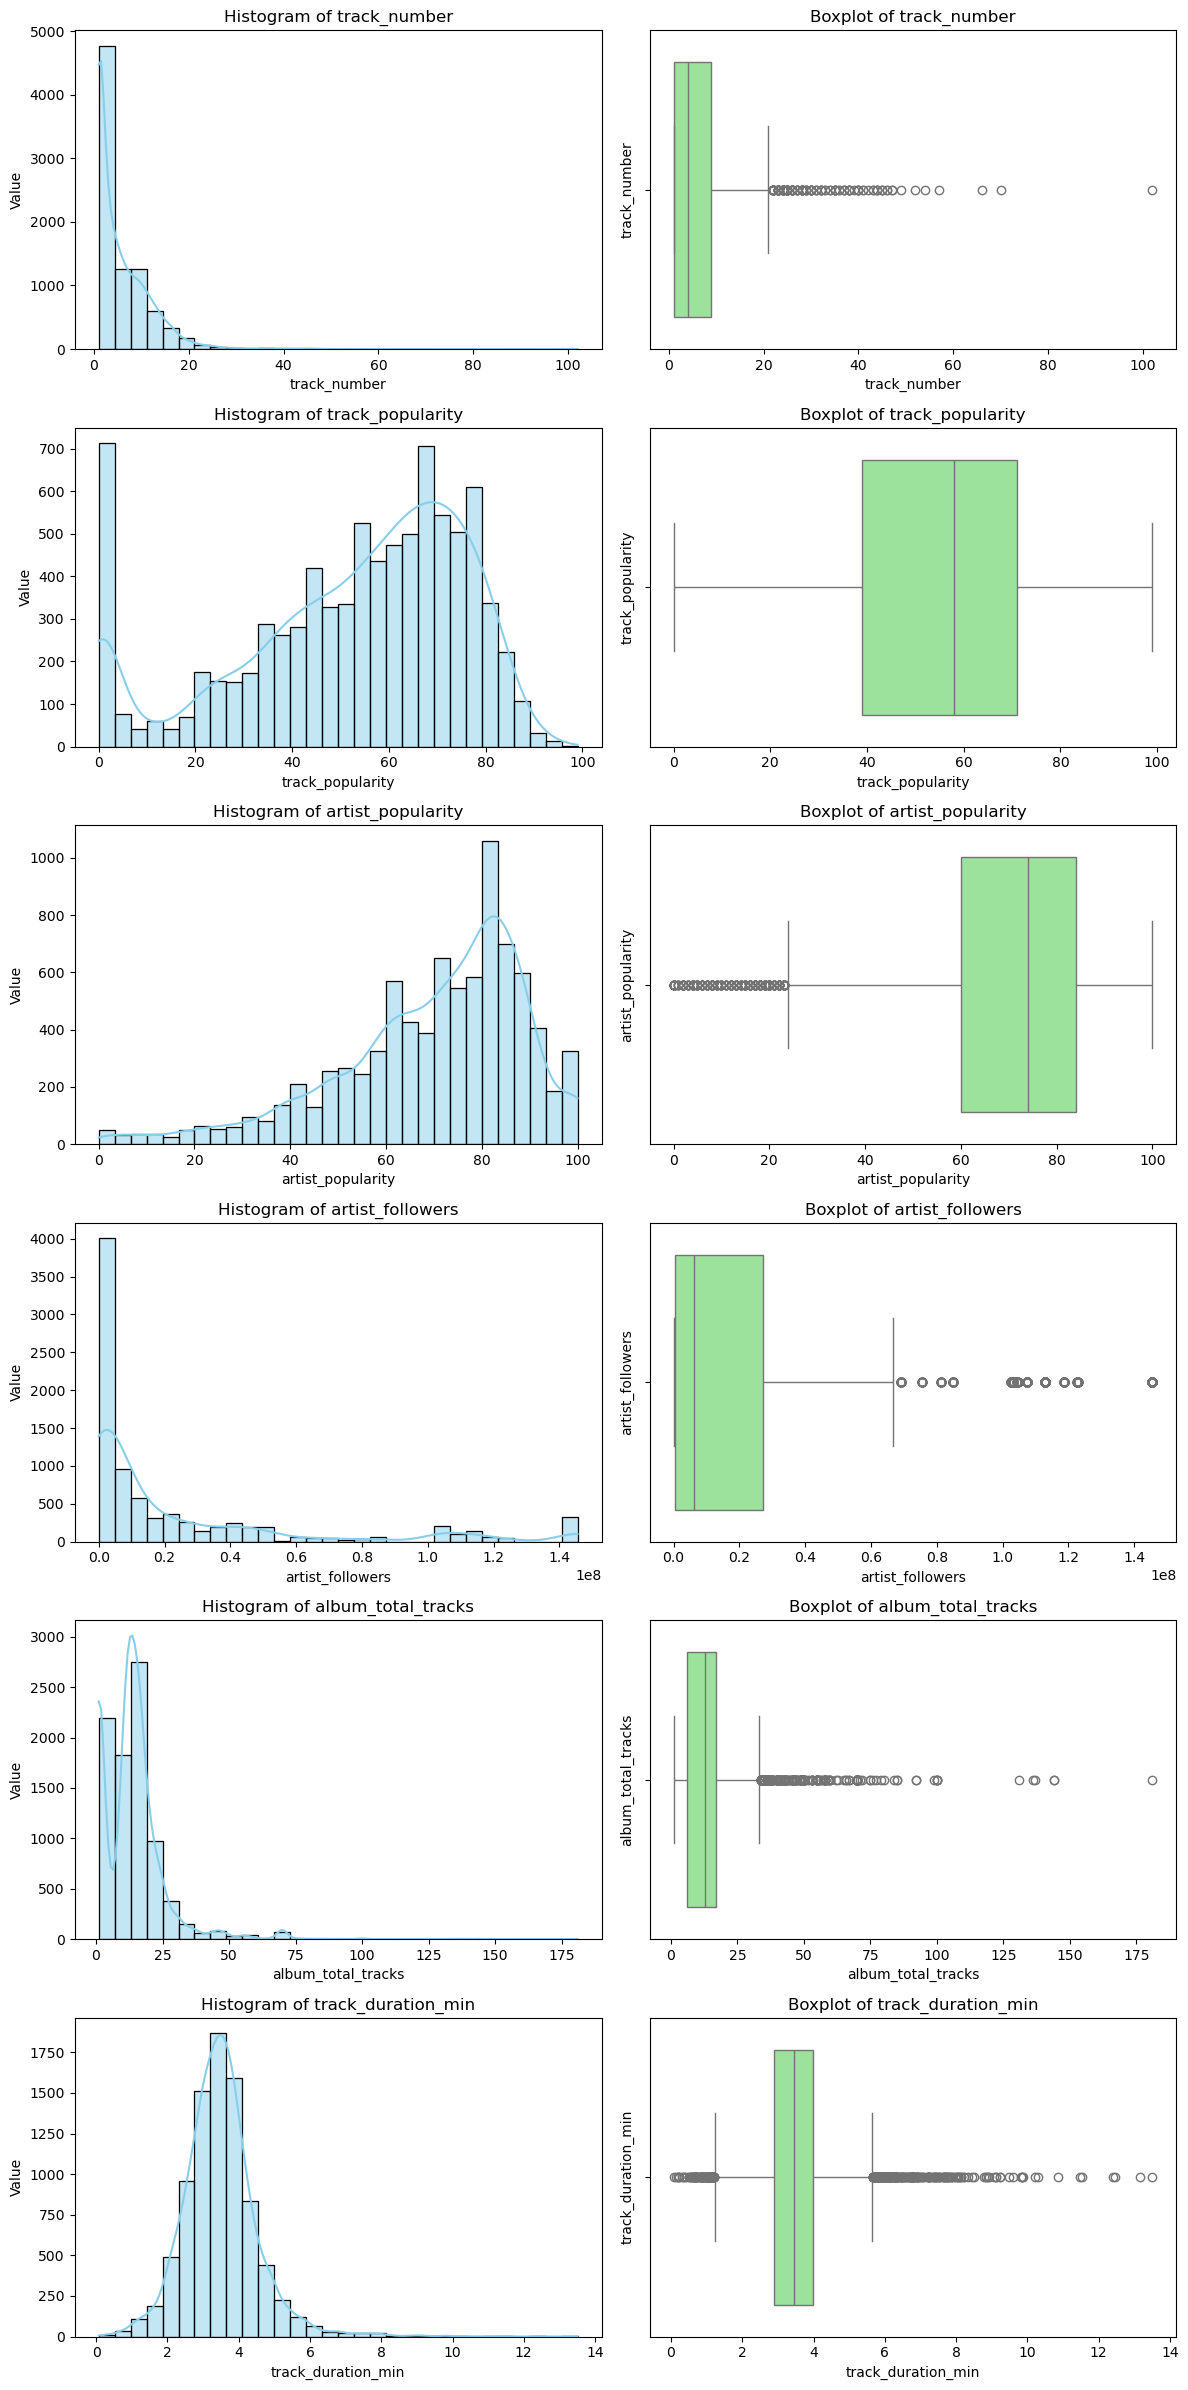

In [10]:
n_cols = len(num_cols)
fig, axes = plt.subplots(nrows=n_cols, ncols=2, figsize=(12,4*n_cols))

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde = True, bins =30, color ='skyblue', ax = axes[i,0])
    axes[i,0].set_title(f'Histogram of {col}')
    axes[i,0].set_xlabel(col)
    axes[i,0].set_ylabel('Value')
    
    sns.boxplot(x=df[col], color='lightgreen', ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot of {col}')
    axes[i,1].set_ylabel(col)
    
plt.tight_layout()
plt.show()

Hình dáng dữ liệu
| Biến | Dạng phân phối | Đặc điểm chính |
|-----|---------------|----------------|
| `track_number` | Lệch phải (Right-skewed) | Phần lớn track nằm ở đầu album; có đuôi phải dài và nhiều outlier |
| `track_popularity` | Gần đối xứng | Giá trị tập trung quanh mức trung bình (khoảng 50–70); có một cụm nhỏ gần 0 |
| `artist_popularity` | Lệch trái (Left-skewed) | Đa số nghệ sĩ có độ phổ biến cao; ít nghệ sĩ rất ít phổ biến |
| `artist_followers` | Lệch phải rất mạnh | Nhiều nghệ sĩ có ít follower; một số ít có số follower cực lớn (outlier) |
| `album_total_tracks` | Lệch phải | Phần lớn album có số track ít; một số album rất dài tạo outlier |
| `track_duration_min` | Gần phân phối chuẩn | Phân phối dạng chuông quanh 3–4 phút; đuôi phải nhẹ (bài dài bất thường) |


 * Tính toán các giá trị: mean, median, std

In [11]:
dist_dict = {}
for col in num_cols:
    dist_dict[col] = {
        'mean': df[col].mean(),
        'median':df[col].median(),
        'std':df[col].std()
    }

dist_df = pd.DataFrame(dist_dict).T
dist_df = dist_df.round(2)
dist_df

,mean,median,std
track_number,5.77,4.00,6.05
track_popularity,52.36,58.00,23.82
artist_popularity,69.73,74.00,19.65
artist_followers,24034719.33,6105547.00,38031804.96
album_total_tracks,13.79,13.00,11.89
track_duration_min,3.49,3.44,1.06


#### 2. Range & Outliers

 * Giá trị nhỏ nhất và lớn nhất là bao nhiêu?

In [12]:
range_dict = {}
for col in num_cols:
    range_dict[col] = {
        'min': df[col].min(),
        'max':df[col].max()
    }

range_df = pd.DataFrame(range_dict).T
pd.options.display.float_format = '{:.2f}'.format
range_df

,min,max
track_number,1.00,102.00
track_popularity,0.00,99.00
artist_popularity,0.00,100.00
artist_followers,0.00,145542136.00
album_total_tracks,1.00,181.00
track_duration_min,0.07,13.51


 * Các giá trị min/max có hợp lý không, hay cho thấy lỗi dữ liệu?  
→ Các giá trị min/max là hoàn toàn hợp lí

 * Xác định các giá trị ngoại lai bằng biểu đồ hộp (box plot), phương pháp IQR.

In [13]:
def detect_outliers(col):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    num_outliers = outliers.shape[0]
    return lower_bound, upper_bound, num_outliers

outlier_dict = {}
for col in num_cols:
    lower, upper, count = detect_outliers(col)
    outlier_dict[col] = {
        'lower_bound': lower,
        'upper_bound': upper,
        'number_outliers': count
    }
outlier_df = pd.DataFrame(outlier_dict).T           
outlier_df

,lower_bound,upper_bound,number_outliers
track_number,-11.00,21.00,166.00
track_popularity,-9.00,119.00,0.00
artist_popularity,24.00,120.00,286.00
artist_followers,-39723026.50,67437897.50,1044.00
album_total_tracks,-10.50,33.50,379.00
track_duration_min,1.21,5.66,358.00


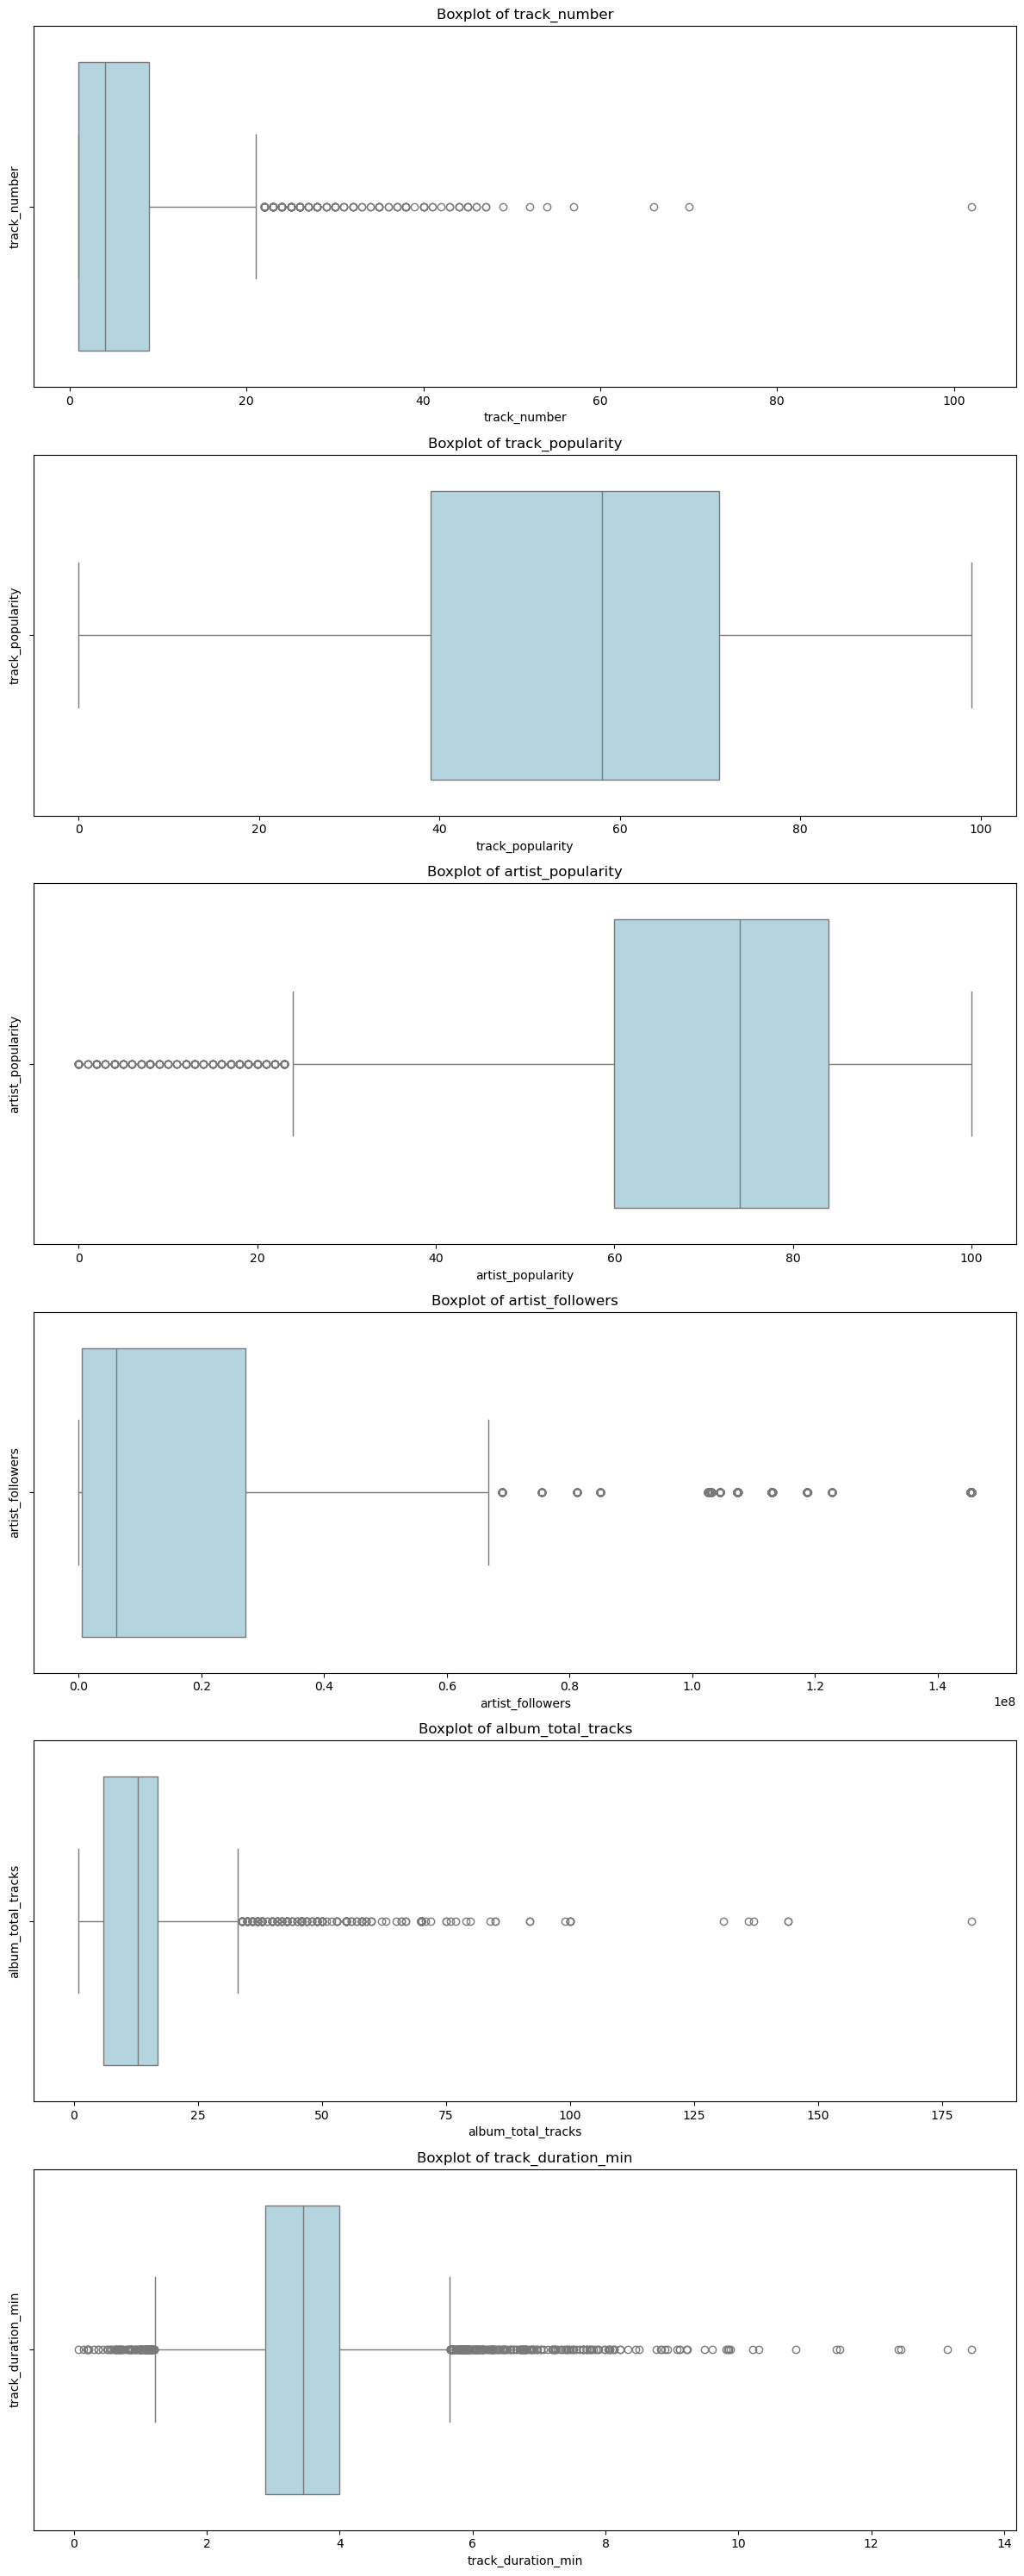

In [14]:
n_cols = len(num_cols)

fig, axes = plt.subplots(nrows=n_cols, ncols=1, figsize=(12,5*n_cols))

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], color='lightblue', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
    
plt.tight_layout()
plt.show()

 * Các giá trị ngoại lai là cực trị thật hay lỗi nhập dữ liệu?  
    * Các giá trị ngoại lai là cực trị (vì max, min hợp lí)

#### 3. Data Quality:

 * Bao nhiêu phần trăm giá trị bị thiếu?

In [15]:
miss_dict = {}

for col in num_cols:
    missing_count = df[col].isna().sum()
    missing_percent = round((missing_count)/len(df)*100,2)
    miss_dict[col] = {
        'missing_count': missing_count,
        'missing_percent': missing_percent
    }
miss_df = pd.DataFrame(miss_dict).T
miss_df

,missing_count,missing_percent
track_number,0.00,0.00
track_popularity,0.00,0.00
artist_popularity,0.00,0.00
artist_followers,0.00,0.00
album_total_tracks,0.00,0.00
track_duration_min,0.00,0.00


 * Có giá trị nào không hợp lệ không? (ví dụ: tuổi âm, giá bằng 0)

In [16]:
invalid_mask = (df[num_cols] < 0).any(axis=1)

if(df[invalid_mask].empty):
    print('Không có giá trị không hợp lệ')
else:
    print('Giá trị không hợp lệ')
    df[invalid_mask]

Không có giá trị không hợp lệ


* Có tồn tại các giá trị thay thế (placeholder) không?

In [17]:
placeholders = [-1,999,9999]
placeholder_mask = df[num_cols].isin(placeholders)

placeholder_counts = placeholder_mask.sum().sum()

print("Số lượng giá trị thay thế (placeholder): ", placeholder_counts)

Số lượng giá trị thay thế (placeholder):  0


### 2.3. Phân tích Cột Phân loại (Categorical Columns)

#### 1. Phân bố giá trị (Value Distribution)

In [18]:
cat_cols = ['explicit', 'artist_genres','album_type']

 * Có bao nhiêu giá trị khác nhau (unique/distinct)?

In [19]:
summary = []

for col in cat_cols:
    n_unique = df[col].nunique()
    top_val = df[col].mode().iloc[0]
    freq = df[col].value_counts().iloc[0]
    pct = (freq / len(df)) * 100

    summary.append({
        "Cột": col,
        "Số giá trị unique": n_unique,
        "Giá trị phổ biến nhất": top_val,
        "Tần suất": freq,
        "Tỷ lệ (%)": round(pct, 1)
    })

summary_df = pd.DataFrame(summary)
summary_df

,Cột,Số giá trị unique,Giá trị phổ biến nhất,Tần suất,Tỷ lệ (%)
0,explicit,2,False,6434,75.00
1,artist_genres,661,soundtrack,345,4.00
2,album_type,3,album,5856,68.20


 * 5–10 giá trị xuất hiện thường xuyên nhất là gì?

In [20]:
for col in cat_cols:
    print(f"\n--- Top 10 giá trị phổ biến nhất của cột '{col}' ---")
    display(
        df[col]
        .value_counts()
        .head(10)
        .reset_index()
        .rename(columns={'index': col, col: 'Tần suất'})
    )


--- Top 10 giá trị phổ biến nhất của cột 'explicit' ---


,Tần suất,count
0,False,6434
1,True,2148



--- Top 10 giá trị phổ biến nhất của cột 'artist_genres' ---


,Tần suất,count
0,soundtrack,345
1,pop,326
2,"country, pop, indie, folk",324
3,soft pop,199
4,rap,187
5,"r&b pop, alternative r&b, hip hop, synthpop",141
6,dark r&b,110
7,"alternative pop, indie pop",99
8,k-pop,92
9,"grunge, rock",91



--- Top 10 giá trị phổ biến nhất của cột 'album_type' ---


,Tần suất,count
0,album,5856
1,single,2219
2,compilation,507


 * Trực quan hóa dữ liệu: bar charts, count plots

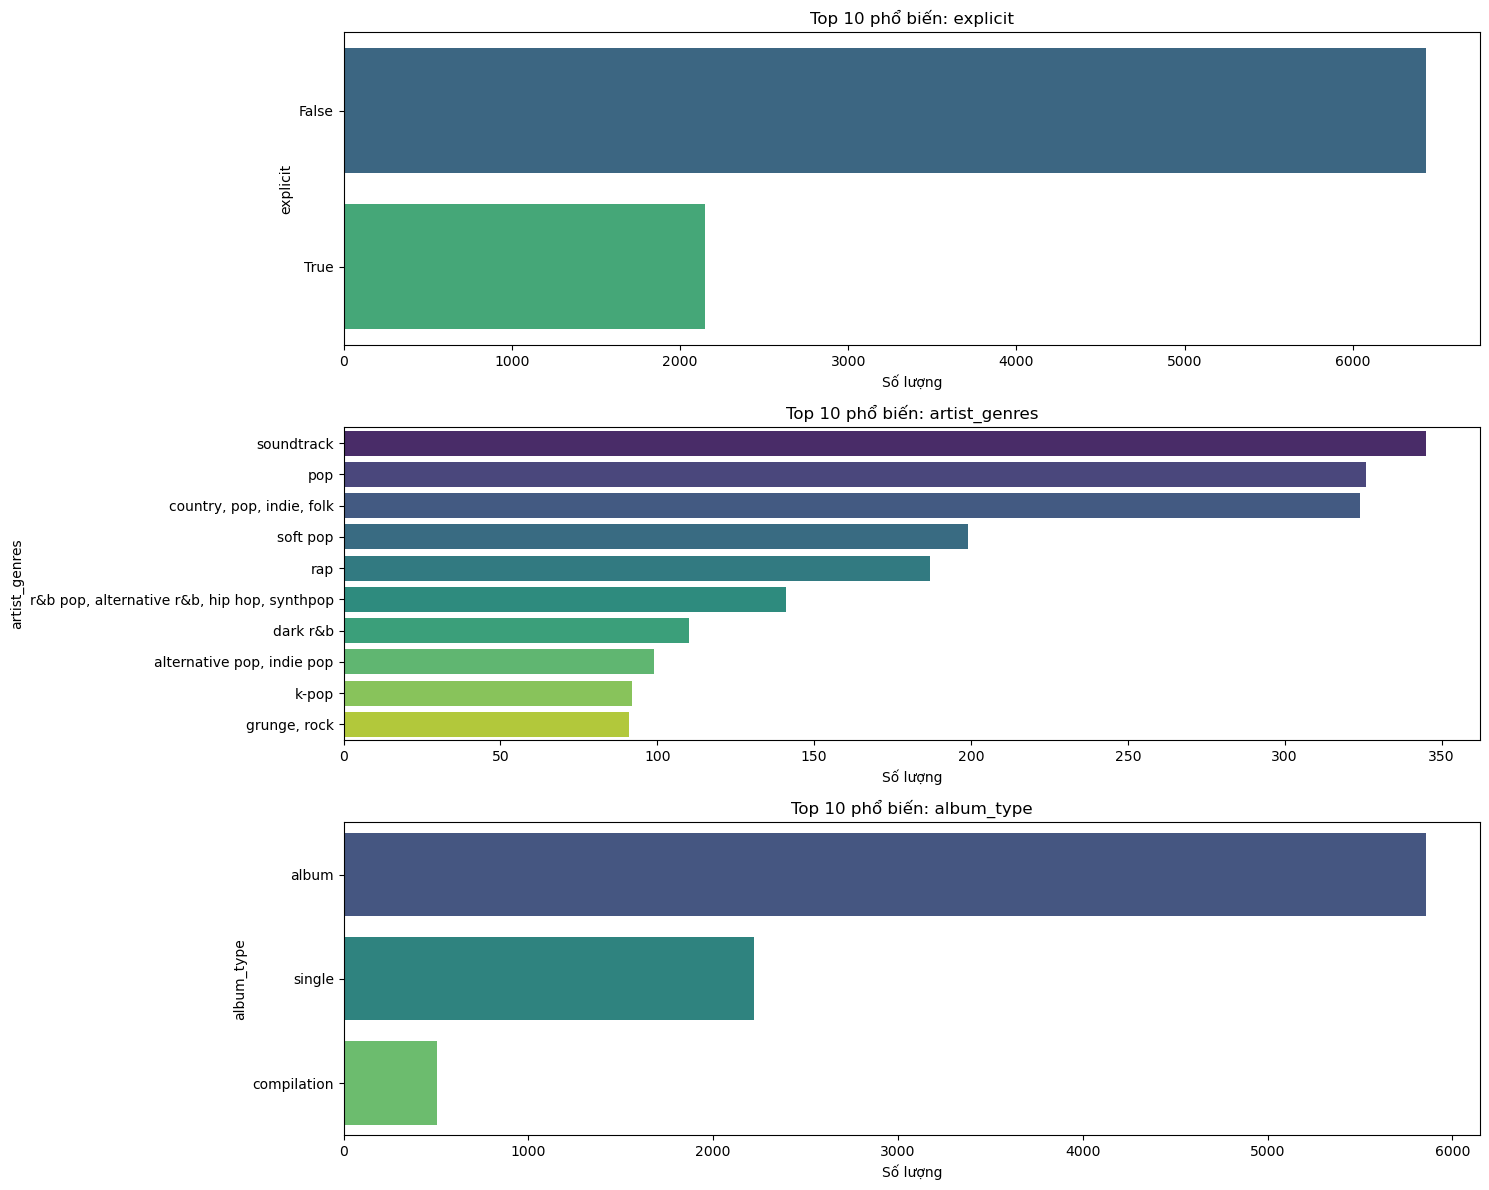

In [21]:
plt.figure(figsize=(15, 4 * len(cat_cols))) 

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i) 
    top_10 = df[col].value_counts().head(10).index
    sns.countplot(y=col, data=df, order=top_10, palette='viridis')
    
    plt.title(f'Top 10 phổ biến: {col}')
    plt.xlabel('Số lượng')

plt.tight_layout()
plt.show()

 * Phân bố dữ liệu có cân bằng hay bị mất cân bằng nghiêm trọng?
    * `explicit`: Giá trị False chiếm áp đảo so với True (Số bài hát không có nội dung nhạy cảm nhiều hơn rất nhiều)  
      → Phân phối mất cân bằng (highly imbalanced)  

    * `artist_genres`: Chỉ một số ít thể loại chiếm phần lớn dữ liệu  
      → Phân phối mất cân bằng (highly imbalanced)  
      
    * `album_type`: album chiếm đa số, single ít hơn đáng kể và compilation chiếm tỷ lệ rất nhỏ  
      → Phân phối mất cân bằng (highly imbalanced)

#### 2. Chất lượng dữ liệu 

 * Bao nhiêu phần trăm giá trị bị thiếu?
 * Có tồn tại sự không nhất quán trong các danh mục (category) không?

In [22]:
quality_data = []

for col in cat_cols:
    miss_count = df[col].isnull().sum()
    miss_pct = (miss_count / len(df)) * 100
    if df[col].dtype == 'object':
        n_orig = df[col].dropna().nunique()
        n_lower = df[col].dropna().str.lower().nunique()
        is_inconsistent = "CÓ LỖI" if n_orig != n_lower else "KHÔNG LỖI"
    else:
        is_inconsistent = "Không áp dụng"
    if col == 'artist_genres':
        def safe_parse(x):
            try:
                if pd.isna(x): return []
                if isinstance(x, str) and x.strip().startswith("["):
                    return [g.strip().lower() for g in ast.literal_eval(x)]
                return [g.strip().lower() for g in str(x).split(",")]
            except:
                return []

        all_genres = [g for sublist in df[col].apply(safe_parse) for g in sublist]
        counts = Counter(all_genres)
        rare_count = sum(1 for v in counts.values() if v <= 2)
        
    else:
        rare_count = (df[col].value_counts() <= 2).sum()
    quality_data.append([
        col, miss_count, f"{miss_pct:.1f}%", is_inconsistent, rare_count
    ])

quality_df = pd.DataFrame(
    quality_data,
    columns=['Column', 'Missing Values', '% Missing', 'Inconsistency Check', 'Rare Values (<=2)']
)

display(quality_df)

,Column,Missing Values,% Missing,Inconsistency Check,Rare Values (<=2)
0,explicit,0,0.0%,Không áp dụng,0
1,artist_genres,3361,39.2%,KHÔNG LỖI,150
2,album_type,0,0.0%,KHÔNG LỖI,0


 * Có tồn tại các giá trị bất thường hoặc không như mong đợi không?



In [23]:
print("Số unique values trong các cột phân loại: ")
for col in cat_cols:
    print(f"\n{col}:")
    print(list(df[col].dropna().unique()))

Số unique values trong các cột phân loại: 

explicit:
[True, False]

artist_genres:
['moombahton', 'country hip hop, southern hip hop', 'dark r&b', 'nigerian drill, alté, afro adura, afrobeats, afrobeat, afroswing', 'c-pop', 'pop punk, emo', 'slap house', 'neo-psychedelic, indie', 'hypertechno', 'house', 'sholawat, khaleeji', 'edm', 'hipdut', 'big room', 'melodic rap', 'bedroom pop', 'k-pop', 'hypertechno, melbourne bounce', 'hard techno', 'country, pop, indie, folk', 'jazz rap', 'melodic bass, future bass', 'chicago drill', 'melodic bass, nightcore, bass music', 'future house', 'stutter house, house', 'country', 'egyptian pop, khaleeji', 'moroccan pop', 'french rap, pop urbaine, french r&b, moroccan pop', 'jersey club', 'pop', 'bongo flava', 'indie r&b', 'afrobeat', 'christian hip hop', 'pop soul', 'anime rap, anime', '3 step, gqom', 'funk de bh, funk carioca', 'alté, nigerian drill, afrobeats, afrobeat', 'melodic bass', 'afrobeats', 'soft pop', 'arrocha', 'brazilian funk, trap funk, 

→ Theo kết quả thì không tồn tại giá trị bất thường.

 * Có những danh mục có rất ít quan sát không? Có nên gộp chúng lại không?  
 → Ở cột `artist_genres` thì có thể thấy có tới 661 giá trị khác nhau, rất nhiều so với các cột khác và chúng ta có thể thấy thì top các thể loại có số lượng nhiều vượt trội so với các thể loại ít được nghệ sĩ dùng nên chúng ta phải gộp chúng vào một mục đó là Other để dễ dàng hơn trong việc train model sau này

In [24]:
TOP_N = 20

def parse_genres(x):
    if pd.isna(x) or x == "":
        return []
    try:
        if isinstance(x, str) and x.strip().startswith("["):
            return [g.strip().lower() for g in ast.literal_eval(x)]
        return [g.strip().lower() for g in x.split(",")]
    except:
        return []

df['genres_list'] = df['artist_genres'].apply(parse_genres)

all_genres = []
for genres in df['genres_list']:
    all_genres.extend(genres)

genre_counts = Counter(all_genres)
top_genres = [g for g, _ in genre_counts.most_common(TOP_N)]

def group_genres(genres):
    if not genres or genres == ['unknown']:
        return ['unknown']
    
    kept = [g for g in genres if g in top_genres]
    
    if not kept:
        return ['other']
    
    return kept

df['genres_grouped'] = df['genres_list'].apply(group_genres)
df['genres_final'] = df['genres_grouped'].apply(lambda x: ", ".join(x))

print(df['genres_final'].value_counts().head(15))


genres_final
unknown                                        3361
other                                          1692
soundtrack                                      450
pop                                             381
country, pop, indie, folk                       324
country                                         273
soft pop                                        203
rap                                             201
alternative pop                                 160
r&b pop, alternative r&b, hip hop, synthpop     141
rock                                            114
dark r&b                                        114
edm                                             110
grunge, rock                                     93
art pop                                          88
Name: count, dtype: int64


### 2.4. Missing Data Analysis

#### 1. Đánh giá tổng quan:

* Tạo bảng tổng hợp các giá trị thiếu: tên cột, số lượng giá trị thiếu và phần trăm giá trị thiếu.

In [25]:
miss_dict = {}

for col in df.columns:
    missing_count = df[col].isna().sum()
    missing_percent = round((missing_count)/len(df)*100,2)
    miss_dict[col] = {
        'missing_count': missing_count,
        'missing_percent':missing_percent
    }
miss_df = pd.DataFrame(miss_dict).T
miss_df

,missing_count,missing_percent
track_id,0.00,0.00
track_name,0.00,0.00
track_number,0.00,0.00
track_popularity,0.00,0.00
explicit,0.00,0.00
artist_name,3.00,0.03
artist_popularity,0.00,0.00
artist_followers,0.00,0.00
artist_genres,3361.00,39.16
album_id,0.00,0.00


 * Trực quan hóa các mẫu dữ liệu bị thiếu (sử dụng heatmap hoặc biểu đồ cột).

Text(0.5, 1.0, 'Missing value heatmap')

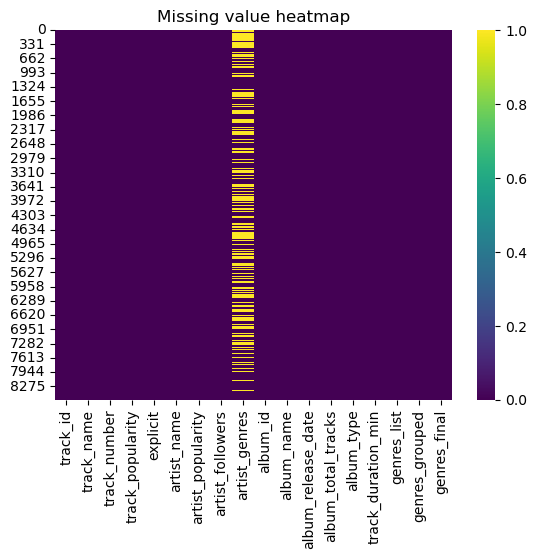

In [26]:
sns.heatmap(df.isnull(), cmap="viridis")
plt.title('Missing value heatmap')

 * Xác định xem dữ liệu bị thiếu là ngẫu nhiên hay có quy luật?  
  →Tập trung `artist_genres` và ngẫu nhiên tại `artist_name`

#### 2. Chiến lược xử lý theo từng cột:

Với mỗi cột có giá trị bị thiếu:
- Giải thích vì sao dữ liệu bị thiếu?
  - Data collection issues: Dữ liệu thu thập từ các nguồn không trả về genre cho một số artist.
  - Not applicable: artist mới, chưa phân loại genre.
  - Random: tại cột `artist_name`
- Kế hoạch xử lý:
  - Đối với `artist_genres`: Giữ cột và điền "Unknown".
  - Đối với `artist_name`: Vì khi train model sẽ xóa cột, nên điền giá trị bằng "Unknown".

In [27]:
df.fillna("Unknown")

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min,genres_list,genres_grouped,genres_final
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55,[moombahton],[other],other
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07,"[country hip hop, southern hip hop]",[other],other
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,Unknown,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55,[],[unknown],unknown
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69,[moombahton],[other],other
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39,[dark r&b],[dark r&b],dark r&b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,0AQquaENerGps8BQmbPw14,Big Iron,1,71,False,Marty Robbins,60,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,3.92,"[classic country, outlaw country]",[other],other
8578,4f8hBeMXMvssn6HtFAtblo,El Paso,10,64,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,4.32,"[classic country, outlaw country]",[other],other
8579,0Vy7wsXNFrbNc6UTWoScnM,Over the Rainbow,5,8,False,The Mystics,27,18184,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,1959-02-11,9,compilation,2.28,[doo-wop],[other],other
8580,760clbeDBWmBsBLbszWuNZ,I'm A Man,2,55,False,Bo Diddley,44,333376,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,1958-01-01,12,album,2.74,"[blues, classic blues, rock and roll, rockabilly]",[other],other


### 2.5. Mối quan hệ & Tương quan (Relationships & Correlations)

#### 1. Preliminary Patterns

 * Tính ma trận tương quan cho các biến số (numerical variables).

In [28]:
corr_matrix = df[num_cols].corr()
print(corr_matrix)

                    track_number  track_popularity  artist_popularity  \
track_number                1.00             -0.03               0.19   
track_popularity           -0.03              1.00               0.47   
artist_popularity           0.19              0.47               1.00   
artist_followers            0.22              0.23               0.64   
album_total_tracks          0.52             -0.05               0.20   
track_duration_min          0.07              0.11               0.21   

                    artist_followers  album_total_tracks  track_duration_min  
track_number                    0.22                0.52                0.07  
track_popularity                0.23               -0.05                0.11  
artist_popularity               0.64                0.20                0.21  
artist_followers                1.00                0.18                0.17  
album_total_tracks              0.18                1.00                0.06  
track_duration

* Tạo heatmap tương quan.

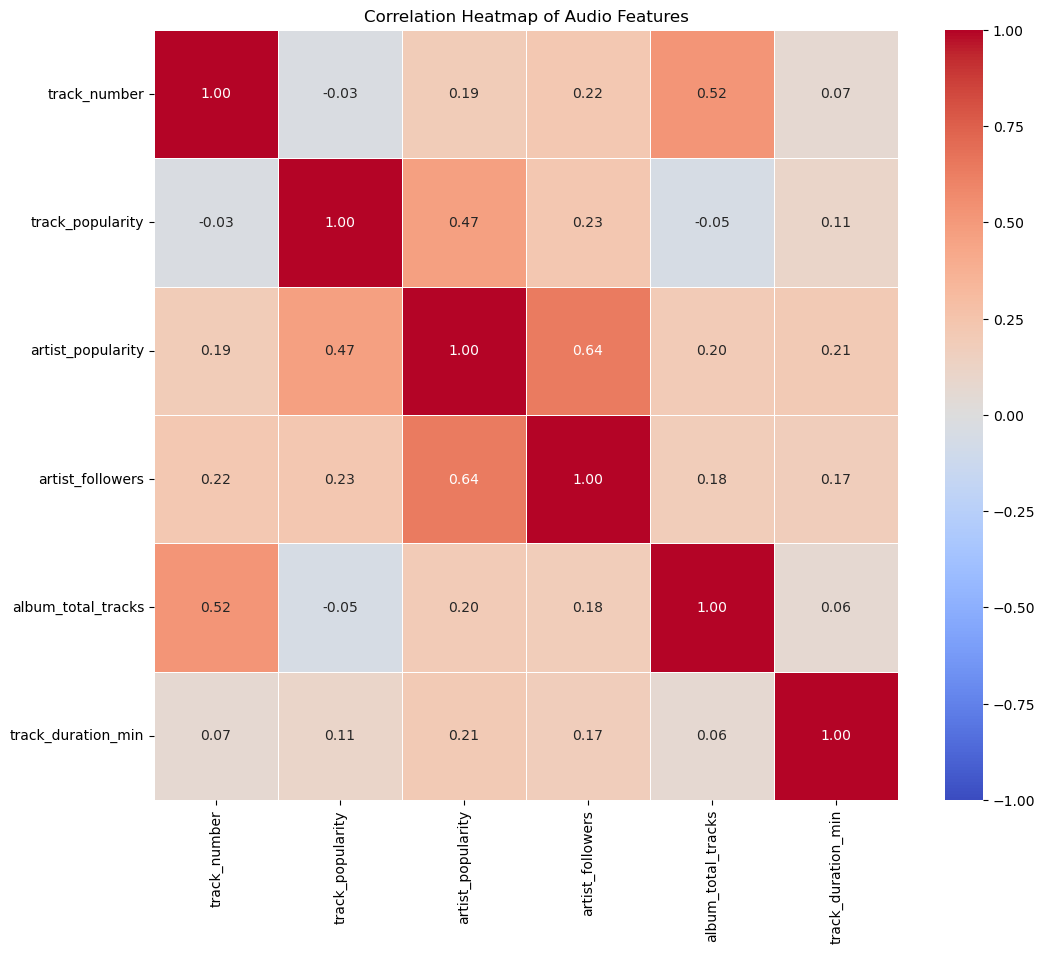

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,       
            fmt=".2f",        
            cmap='coolwarm',  
            linewidths=0.5, 
            vmin=-1, vmax=1)  
plt.title('Correlation Heatmap of Audio Features')
plt.show()

 * Xác định các cặp biến có tương quan mạnh (dương hoặc âm).

In [30]:
threshold = 0.5
print("--- Các cặp biến có sự tương quan mạnh (> 0.5 hoặc < -0.5) ---")
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
strong_pairs = sorted_pairs[(abs(sorted_pairs) > threshold) & (abs(sorted_pairs) < 1.0)]

unique_pairs = []
for index, value in strong_pairs.items():
    pair = tuple(sorted(index)) 
    if pair not in unique_pairs:
        unique_pairs.append(pair)
        print(f"{index[0]} - {index[1]}: {value:.2f}")

if not unique_pairs:
    print("Không tìm thấy cặp biến nào có tương quan mạnh trên mức ngưỡng này.")

--- Các cặp biến có sự tương quan mạnh (> 0.5 hoặc < -0.5) ---
artist_popularity - artist_followers: 0.64
album_total_tracks - track_number: 0.52


 * Có mối quan hệ nào bất ngờ không?  
 → Không có mối quan hệ bất ngờ nào ở kết quả trên. Theo kết quả trên thì các mối quan hệ trên hoàn toàn tự nhiên và có thể dễ dàng suy ra được, nếu ca sĩ có nhiều người theo dõi thì độ nổi tiếng càng cao và ngược lại, điều này tương tự với album_total_tracks và track_number, nếu album có nhiều bài hát thì số thứ tự của bài hát cũng sẽ lớn.   

#### 2. Cross-tabulations

 * Đối với các kết hợp quan trọng giữa các biến phân loại × phân loại (categorical × categorical), tạo bảng tần số.


--- Bảng chéo: Năm và Nội dung nhạy cảm (Explicit) ---


explicit,False,True
year,,
2016,256,120
2017,359,99
2018,317,205
2019,345,151
2020,318,162
2021,301,142
2022,329,139
2023,365,158
2024,446,202


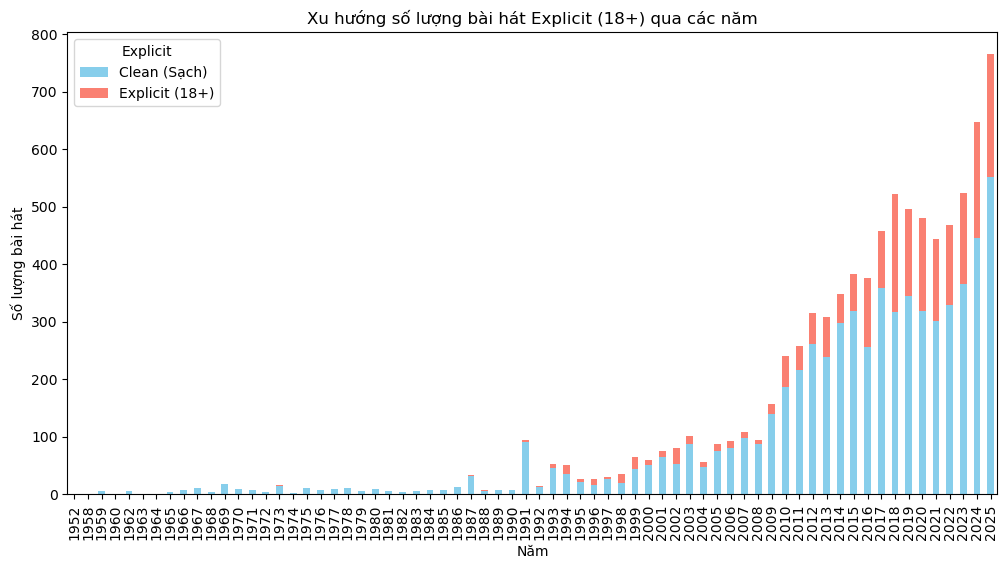

In [31]:
df['year'] = df['album_release_date'].dt.year

if 'year' in df.columns and 'explicit' in df.columns:
    print("\n--- Bảng chéo: Năm và Nội dung nhạy cảm (Explicit) ---")
    cross_tab_explicit = pd.crosstab(df['year'], df['explicit'])
    display(cross_tab_explicit.tail(10)) 
    cross_tab_explicit.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
    plt.title("Xu hướng số lượng bài hát Explicit (18+) qua các năm")
    plt.ylabel("Số lượng bài hát")
    plt.xlabel("Năm")
    plt.legend(title='Explicit', labels=['Clean (Sạch)', 'Explicit (18+)'])
    plt.show()

elif 'year' in df.columns:
    print("Không có cột 'explicit' nhưng đã có 'year'. Hãy thử phương án phân tích khác.")
else:
    print("Vẫn chưa tạo được cột 'year' do không tìm thấy dữ liệu ngày tháng gốc.")

* Đối với các kết hợp giữa biến số × biến phân loại (numerical × categorical), tạo thống kê tóm tắt theo nhóm.

In [32]:
df_exploded = df.copy()
def clean_and_split(val):
    if pd.isna(val):
        return []
    val = str(val).replace('[', '').replace(']', '').replace("'", "").replace('"', '')
    return [x.strip() for x in val.split(',')]
df_exploded['temp_genre_list'] = df_exploded['artist_genres'].apply(clean_and_split)
df_exploded = df_exploded.explode('temp_genre_list')



MIN_TRACKS = 30 
target_pop_col = 'track_popularity'
target_genre_col = 'temp_genre_list' 

print(f"Đang phân tích trên cột đã tách: {target_genre_col}")

group_stats = df_exploded.groupby(target_genre_col)[target_pop_col].describe()


if '' in group_stats.index:
    group_stats = group_stats.drop('') 
    
valid_genres = group_stats[group_stats['count'] >= MIN_TRACKS]

top_rated_genres = valid_genres.sort_values(by='mean', ascending=False).head(10)

print(f"\n--- Top 10 Thể loại (Đã tách & Lọc >= {MIN_TRACKS} bài) ---")
display(top_rated_genres)


Đang phân tích trên cột đã tách: temp_genre_list

--- Top 10 Thể loại (Đã tách & Lọc >= 30 bài) ---


,count,mean,std,min,25%,50%,75%,max
temp_genre_list,,,,,,,,
dark pop,61.00,73.89,10.59,17.00,70.00,74.00,80.00,94.00
electropop,61.00,73.89,10.59,17.00,70.00,74.00,80.00,94.00
trap latino,64.00,73.53,12.90,6.00,71.00,75.00,78.00,91.00
urbano latino,74.00,73.05,12.72,6.00,70.00,75.00,78.00,91.00
reggaeton,85.00,71.94,14.12,6.00,70.00,74.00,78.00,91.00
west coast hip hop,38.00,70.16,15.94,2.00,63.00,74.50,80.00,89.00
post-grunge,36.00,69.78,14.03,1.00,67.00,72.50,76.25,85.00
latin,96.00,68.72,17.13,1.00,67.00,72.00,77.00,91.00
gangster rap,33.00,68.09,9.86,41.00,62.00,70.00,77.00,82.00


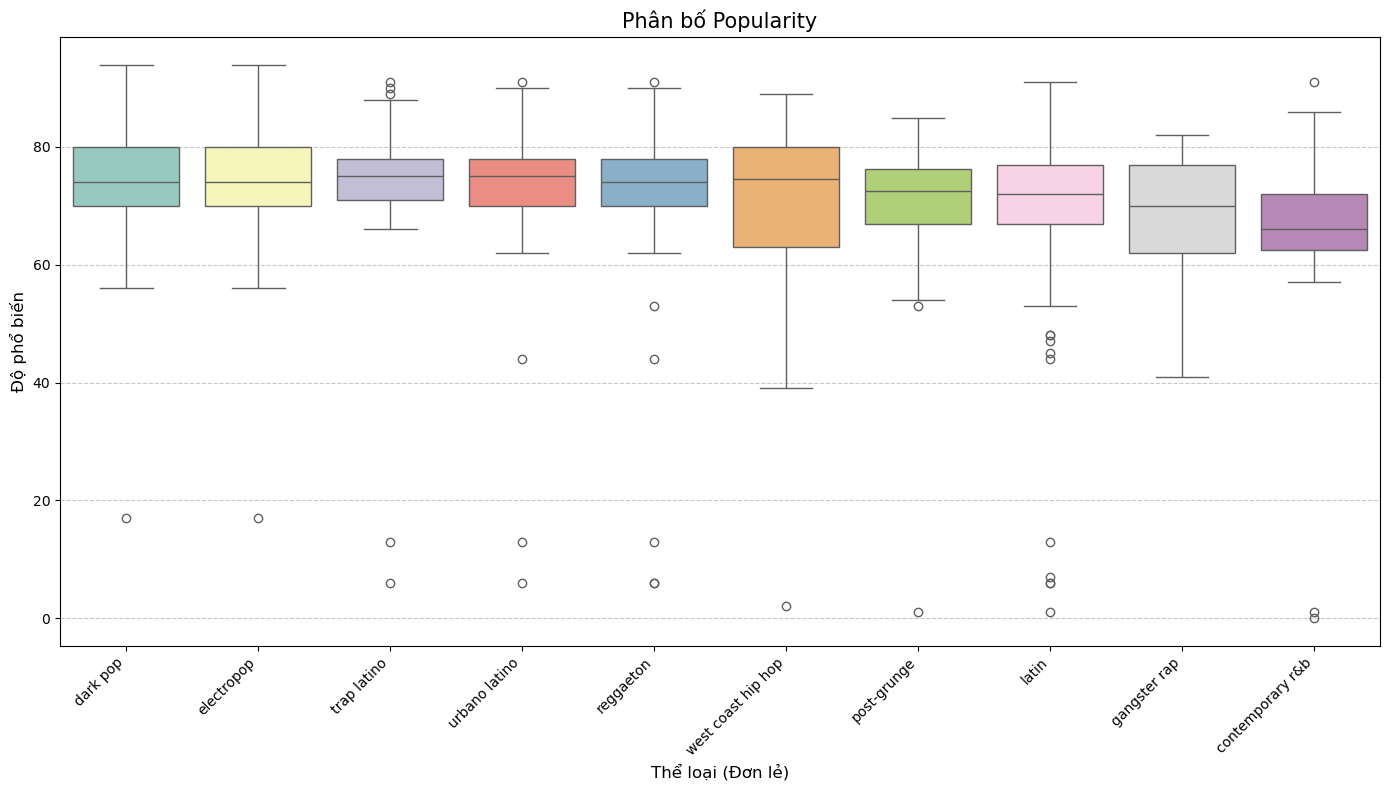

In [33]:
plt.figure(figsize=(14, 8))
top_genre_names = top_rated_genres.index.tolist()

df_plot = df_exploded[df_exploded[target_genre_col].isin(top_genre_names)]

sns.boxplot(
    x=target_genre_col, 
    y=target_pop_col, 
    data=df_plot, 
    order=top_genre_names, 
    palette="Set3"
)

plt.title(f'Phân bố Popularity' , fontsize=15)
plt.xlabel('Thể loại (Đơn lẻ)', fontsize=12)
plt.ylabel('Độ phổ biến', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2.6. Initial Observations & Insights
1. Tóm tắt
- Tóm tắt các điểm nổi bật:
  - Bộ dữ liệu chứa thông tin hơn 8.000 bài hát, phân bố trên nhiều nghệ sĩ, album và thể loại nhạc khác nhau, tạo điều kiện phân tích đa dạng về âm nhạc và hành vi nghe nhạc.
  - Các trường dữ liệu cơ bản đều được điền đầy đủ (ngoại trừ `artist_genres` với tỉ lệ thiếu là $39$ %), bao gồm thông tin về track, artist, album, popularity, explicit → thuận lợi cho xử lý và phân tích thống kê.
- Vấn đề chất lượng dữ liệu đã phát hiện:
  - Thiếu thông tin thể loại nhạc (artist_genres) → cần gán mặc định "Unknown".
  - Không có missing value ở các cột số (`track_popularity`, `artist_popularity`, `artist_followers`,`album_total_tracks`, `track_duration_min`) → thuận lợi cho phân tích định lượng.
- Các bước tiền xử lý cần thiết:
  - Điền missing value cho `artist_genres` và `artist_name` bằng "Unknown".
- Các mẫu hình thú vị dẫn đến câu hỏi nghiên cứu:
  - Mối quan hệ giữa popularity và đặc điểm nghệ sĩ.
  - Các yếu tố ảnh hưởng đến `track_popularity`.

2. Cảnh báo dữ liệu (Red Flags)
- Các vấn đề nghiêm trọng về chất lượng dữ liệu:
  - `artist_genres` bị thiếu khoảng 39% → ảnh hưởng khi phân tích theo thể loại nhạc hoặc nhóm nghệ sĩ.
  - Dữ liệu lệch trái đối với các cột `track_number`, `artist_followers`, `album_total_tracks`
- Các hạn chế có thể ảnh hưởng đến phân tích:
  - `artist_followers` và `track_popularity` có thể thay đổi theo thời gian -> dữ liệu là snapshot tại một thời điểm, không phản ánh thay đổi thực tế.
  - Không có thông tin về quốc gia phát hành hoặc khu vực địa lý -> không thể phân tích sự khác biệt vùng miền hoặc quốc tế.

In [34]:
# Ghi lại file đã xử lí missing value
df.to_csv("../data/processed/fill_missing_values.csv")